In [4]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.

In [5]:
ctrl={}
case={}

ctrl['path_root']='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'
ctrl['machine_target']='gfdl.ncrc4-intel19-prod'
ctrl['name']='OM4p5_CORE2_IAF_gzCOBALT-013022_cy5'

case['path_root']='/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2'
case['machine_target']='gfdl.ncrc4-intel19-prod'
case['name']='OM4p5_CORE2_IAF_gzCOBALT-tun_cy5'
case['name']='OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5'
#case['name']='OM4p5_CORE2_IAF_gzCOBALT-hp_cy5'

In [6]:
short_casename=case['name'].replace('OM4p5_CORE2_IAF_','')
if short_casename=="gzCOBALT-060822":
    fig_casename='gzCOBALT-tun_cy1'
else:
    fig_casename=short_casename
print(short_casename, fig_casename)

gzCOBALT-tun_hp_cy5 gzCOBALT-tun_hp_cy5


In [7]:
phyto_varlist = ['di', 'smp', 'lgp']
zoo_varlist = ['smz', 'mdz', 'lgz', 'smt', 'lgt']

In [8]:
tmpdir = '/work/Jessica.Luo/tmp/'+case['name']
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5


In [9]:
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z'] 

pp_dates=['1988-2007','2048-2067']

files=[glob(tmpdir + '/'+ d + '.' + pp_dates[0] + '*.nc') for d in diagTypes]
if not files:
    files=[glob(tmpdir + '/'+ d + '.' + pp_dates[1] + '*.nc') for d in diagTypes]
files=sorted([f for fi in files for f in fi]) # nested list comprehension
print(files)

['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_omip_tracers_month_z.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_omip_tracers_month_z.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_omip_tracers_month_z.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_omip_tracers_month_z.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_omip_tracers_month_z.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_omip_tracers_month_z.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_omip_tracers_month_z.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_omip_tracers_month_z.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_omip_tracers_month_z.1988-2007.09.nc', 

In [10]:
if not files:
    pp_path=os.path.join(case['path_root'], case['name'], case['machine_target'], 'pp')
    
    files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    files=sorted([f for fi in files for f in fi]) # nested list comprehension
    print(files)


In [11]:
ds=xr.open_mfdataset(files, combine='by_coords')

#grid_file=os.path.join(case['path_root'], case['name'], case['machine_target'], 'pp')+'/ocean_annual/ocean_annual.static.nc'
grid_file='/work/jyl/tmp/ocean_static.nc'
grid=xr.open_dataset(grid_file)

In [12]:
tmpdir = '/work/Jessica.Luo/tmp/'+ctrl['name']
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)
    
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z'] 

c_pp_dates='1988-2007'

c_files=[glob(tmpdir + '/'+ d + '.' + c_pp_dates + '*.nc') for d in diagTypes]

c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension

if not c_files:
    pp_path=os.path.join(ctrl['path_root'], ctrl['name'], ctrl['machine_target'], 'pp')
    
    c_files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + c_pp_dates + '*.nc') for d in diagTypes]
    
    c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension

#print(c_files)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5


In [13]:
dc=xr.open_mfdataset(c_files, combine='by_coords')

In [14]:
ds['depth_levels']=xr.DataArray(ds.z_i.diff(dim='z_i').values, coords={'z_l':ds.z_l.values}, dims=['z_l'], attrs={'long_name':'Thickness of depth bin', 'units':'meters'})

In [15]:
import string
alphabet=list(string.ascii_lowercase)

In [16]:
grid.basin.attrs

{'long_name': 'Region Selection Index',
 'standard_name': 'region',
 'units': '1.0',
 'interp_method': 'none',
 'flag_values': '0 1 2 3 4 5 6 7 8 9 10',
 'flag_meanings': 'global_land southern_ocean atlantic_ocean pacific_ocean arctic_ocean indian_ocean mediterranean_sea black_sea hudson_bay baltic_sea red_sea'}

In [17]:
basins=['Global Land', 'Southern Ocean', 'Atlantic Ocean', 'Pacific Ocean', 'Arctic Ocean', 'Indian Ocean',\
        'Mediterranean Sea', 'Black Sea', 'Hudson Bay', 'Baltic Sea', 'Red Sea']

In [18]:
days_in_month = xr.DataArray([31,28,31,30,31,30,31,31,30,31,30,31], coords={'time':ds.time}, dims='time')

In [19]:
days_in_month_wgts=days_in_month / days_in_month.mean()
days_in_month_wgts

<xarray.DataArray (time: 12)>
array([1.01917808, 0.92054795, 1.01917808, 0.98630137, 1.01917808,
       0.98630137, 1.01917808, 1.01917808, 0.98630137, 1.01917808,
       0.98630137, 1.01917808])
Coordinates:
  * time     (time) object 1999-07-18 00:00:00 ... 2000-06-17 00:00:00

## Observations

In [20]:
obs_no3 = xr.open_dataset('/work/jyl/validation_data/WOA/nitrate_woa_esm4grid.nc') # micromoles per kilogram, or micromol/L, equivalent to 1e-3 mol m-3
obs_po4 = xr.open_dataset('/work/jyl/validation_data/WOA/phosphate_woa_esm4grid.nc')
obs_sio3 = xr.open_dataset('/work/jyl/validation_data/WOA/silicate_woa_esm4grid.nc')

In [21]:
obs_no3 = obs_no3.n_an
obs_po4 = obs_po4.p_an
obs_sio3 = obs_sio3.i_an

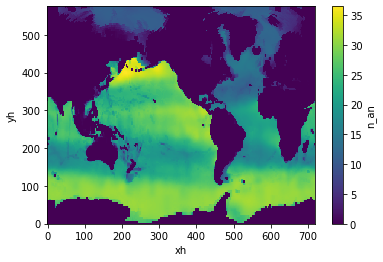

In [22]:
obs_no3.mean(dim='z_l').plot()

## Annual Mean

In [23]:
ds.no3.attrs

{'long_name': 'Dissolved Nitrate Concentration',
 'units': 'mol m-3',
 'cell_measures': 'volume: volcello area: areacello',
 'standard_name': 'mole_concentration_of_nitrate_in_sea_water',
 'cell_methods': 'area:mean z_l:mean yh:mean xh:mean time: mean within months time: mean over years',
 'time_avg_info': 'average_T1,average_T2,average_DT'}

In [24]:
no3_ann = (ds.no3 * days_in_month_wgts).mean(dim='time') * 1e3 # convert to mmol m-3
po4_ann = (ds.po4 * days_in_month_wgts).mean(dim='time') * 1e3
sio2_ann = (ds.si * days_in_month_wgts).mean(dim='time') * 1e3

c_no3_ann = (dc.no3 * days_in_month_wgts).mean(dim='time') * 1e3
c_po4_ann = (dc.po4 * days_in_month_wgts).mean(dim='time') * 1e3
c_sio2_ann = (dc.si * days_in_month_wgts).mean(dim='time') * 1e3

In [25]:
area_weighting = grid.areacello/grid.areacello.mean()

# Plot
## Nitrate

Text(0.5, 1.0, 'Nitrate profile (area weighted), global, mmol m$^{-3}$')

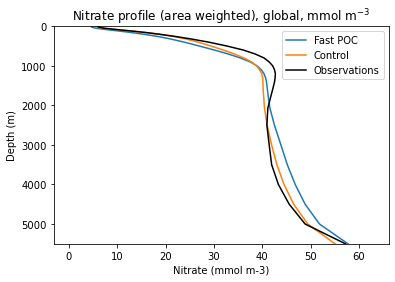

In [26]:
plt.plot((no3_ann * area_weighting).mean(dim=['xh','yh']), ds.z_l.values)
plt.plot((c_no3_ann * area_weighting).mean(dim=['xh','yh']), ds.z_l.values)
plt.plot((obs_no3 * area_weighting).mean(dim=['xh','yh']), ds.z_l.values,'k')

plt.gca().invert_yaxis()

plt.ylabel('Depth (m)')
plt.xlabel('Nitrate (mmol m-3)')
#plt.yticks(ticks=[0,5,10,15,20,25,30],labels=ds.z_l.values[[0,5,10,15,20,25,30]])

plt.ylim([5500,0])

plt.legend(['Fast POC','Control','Observations'])
plt.title('Nitrate profile (area weighted), global, mmol m$^{-3}$')

Text(0.5, 1.0, 'Nitrate profile (area weighted), Atlantic Ocean, mmol m$^{-3}$')

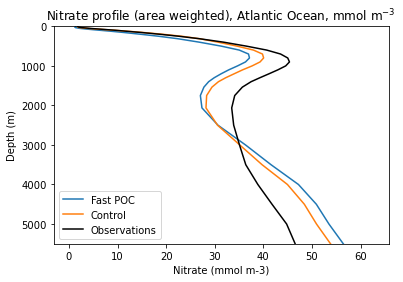

In [27]:
b=2
plt.plot((no3_ann * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values)
plt.plot((c_no3_ann * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values)
plt.plot((obs_no3 * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values,'k')

plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Nitrate (mmol m-3)')

plt.ylim([5500,0])

plt.legend(['Fast POC','Control','Observations'])
plt.title('Nitrate profile (area weighted), '+ basins[b]+', mmol m$^{-3}$')

Text(0.5, 1.0, 'Nitrate profile (area weighted), Pacific Ocean, mmol m$^{-3}$')

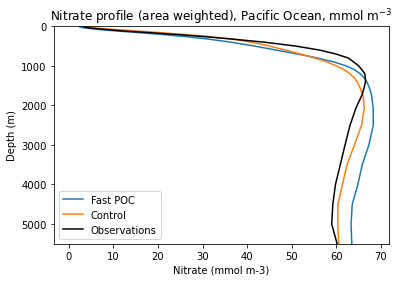

In [28]:
b=3
plt.plot((no3_ann * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values)
plt.plot((c_no3_ann * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values)
plt.plot((obs_no3 * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values,'k')

plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Nitrate (mmol m-3)')

plt.ylim([5500,0])

plt.legend(['Fast POC','Control','Observations'])
plt.title('Nitrate profile (area weighted), '+ basins[b]+', mmol m$^{-3}$')

Text(0.5, 1.0, 'Nitrate profile (area weighted), Southern Ocean, mmol m$^{-3}$')

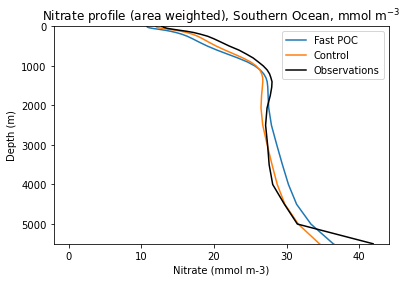

In [29]:
b=1
plt.plot((no3_ann * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values)
plt.plot((c_no3_ann * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values)
plt.plot((obs_no3 * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values,'k')

plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Nitrate (mmol m-3)')

plt.ylim([5500,0])

plt.legend(['Fast POC','Control','Observations'])
plt.title('Nitrate profile (area weighted), '+ basins[b]+', mmol m$^{-3}$')

## Phosphate

Text(0.5, 1.0, 'Phosphate profile (area weighted), global, mmol m$^{-3}$')

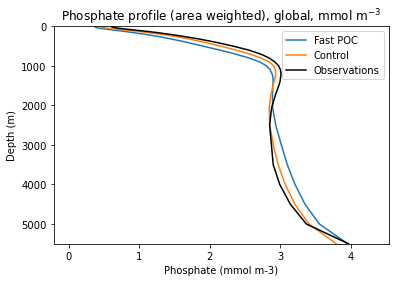

In [30]:
plt.plot((po4_ann * area_weighting).mean(dim=['xh','yh']), ds.z_l.values)
plt.plot((c_po4_ann * area_weighting).mean(dim=['xh','yh']), ds.z_l.values)
plt.plot((obs_po4 * area_weighting).mean(dim=['xh','yh']), ds.z_l.values,'k')

plt.gca().invert_yaxis()

plt.ylabel('Depth (m)')
plt.xlabel('Phosphate (mmol m-3)')

plt.ylim([5500,0])

plt.legend(['Fast POC','Control','Observations'])
plt.title('Phosphate profile (area weighted), global, mmol m$^{-3}$')

Text(0.5, 1.0, 'Phosphate profile (area weighted), Atlantic Ocean, mmol m$^{-3}$')

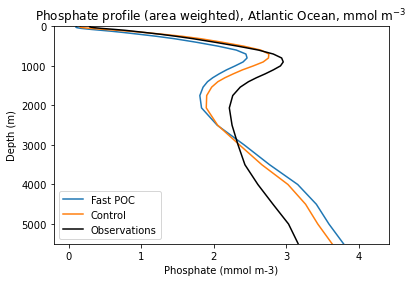

In [31]:
b=2
plt.plot((po4_ann * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values)
plt.plot((c_po4_ann * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values)
plt.plot((obs_po4 * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values,'k')

plt.gca().invert_yaxis()

plt.ylabel('Depth (m)')
plt.xlabel('Phosphate (mmol m-3)')

plt.ylim([5500,0])

plt.legend(['Fast POC','Control','Observations'])
plt.title('Phosphate profile (area weighted), '+ basins[b]+', mmol m$^{-3}$')


Text(0.5, 1.0, 'Phosphate profile (area weighted), Pacific Ocean, mmol m$^{-3}$')

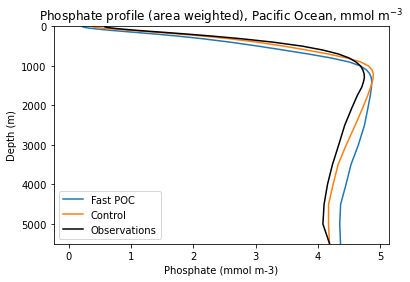

In [32]:
b=3
plt.plot((po4_ann * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values)
plt.plot((c_po4_ann * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values)
plt.plot((obs_po4 * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values,'k')

plt.gca().invert_yaxis()

plt.ylabel('Depth (m)')
plt.xlabel('Phosphate (mmol m-3)')

plt.ylim([5500,0])

plt.legend(['Fast POC','Control','Observations'])
plt.title('Phosphate profile (area weighted), '+ basins[b]+', mmol m$^{-3}$')


Text(0.5, 1.0, 'Phosphate profile (area weighted), Southern Ocean, mmol m$^{-3}$')

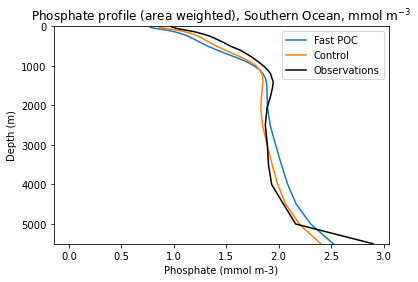

In [33]:
b=1
plt.plot((po4_ann * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values)
plt.plot((c_po4_ann * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values)
plt.plot((obs_po4 * area_weighting).where(grid.basin==b).mean(dim=['xh','yh']), ds.z_l.values,'k')

plt.gca().invert_yaxis()

plt.ylabel('Depth (m)')
plt.xlabel('Phosphate (mmol m-3)')

plt.ylim([5500,0])

plt.legend(['Fast POC','Control','Observations'])
plt.title('Phosphate profile (area weighted), '+ basins[b]+', mmol m$^{-3}$')
